In [2]:
import torch
import matplotlib.pyplot as plt

def plot_func(func, plot_range=[-1, 1], name_list=None, y_range=[-5, 5]):
    # Create data points (avoiding 0 to prevent division by zero)
    x = torch.linspace(plot_range[0], plot_range[1], 1000)
    x = x[x != 0]  # remove 0 to avoid division by zero

    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # If func is a single function, convert it to a list for consistent handling
    if not isinstance(func, list):
        funcs = [func]
    else:
        funcs = func
        labels = name_list
        # If labels aren't provided, create default ones
    
    # Plot each function with a different color
    colors = ['b-', 'r-', 'g-', 'm-', 'c-', 'y-', 'k-']
    print(labels)
    for i, f in enumerate(funcs):
        y = f(x)
        plt.plot(x.numpy(), y.numpy(), colors[i % len(colors)], label=labels[i])
    
    plt.grid(False)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function Plot')
    plt.legend()

    # Set reasonable y-axis limits to better show the function behavior
    plt.ylim(y_range)

    # Show the plot
    plt.show()

In [3]:
import pickle
def plot_accuracy_loss_vs_hash_bits(acc_list, reference_value=0.7925):
    """
    Plot accuracy loss percentage vs hash bits on a logarithmic scale.
    
    Args:
        acc_list: List of tuples (hash_bit, accuracy_loss)
        reference_value: Reference accuracy value for calculating percentage loss
    """
    # Extract data from acc_list
    hash_bits = [item[0] for item in acc_list]
    acc_losses = [item[1] for item in acc_list]
    
    # Calculate percentage of accuracy loss
    acc_loss_percentages = [(abs(loss/reference_value))*100 for loss in acc_losses]
    
    # Create the plot with log scale on y-axis
    plt.figure(figsize=(10, 6))
    plt.semilogy(hash_bits, acc_loss_percentages, 'bo-', linewidth=2, markersize=8)
    plt.grid(True, alpha=0.3)
    
    # Add labels and title
    plt.xlabel('Hash Bits')
    plt.ylabel('Accuracy Loss (%)')
    plt.title('Accuracy Loss vs Hash Bits (Log Scale)')
    
    # Add a horizontal line at y=100% for reference
    plt.axhline(y=100, color='k', linestyle='--', alpha=0.5)
    
    # Format y-axis to show percentage values directly (not log values)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1, decimals=2))
    
    # Ensure y-ticks show actual percentage values
    yticks = plt.yticks()[0]
    plt.yticks(yticks, [f'{y:.2f}%' for y in yticks])
    
    plt.tight_layout()
    plt.show()

In [4]:
def plot_gelu_accuracy_loss(acc_lists, reference_value=0.792):
    """
    Plot accuracy loss vs hash bits for different integer widths.
    
    Args:
        file_paths: List of file paths containing accuracy data for different integer widths
        reference_value: Reference accuracy value to calculate percentage loss against
    """
    import pickle
    import matplotlib.pyplot as plt
    
    # Process each file
    all_data = []
    
    for i, acc_list in enumerate(acc_lists):
        int_width = i + 1  # Assuming files are ordered by integer width (1, 2, 3, etc.)
        
        # Extract data and add the integer width to the hash bits
        hash_bits = [item[0] + int_width for item in acc_list]
        acc_losses = [item[1] for item in acc_list]
        
        # Calculate percentage of accuracy loss
        acc_loss_percentages = [(abs(loss/reference_value))*100 for loss in acc_losses]
        
        # Filter data to only include hash bits from 4 to 8
        filtered_data = [(bits, loss) for bits, loss in zip(hash_bits, acc_loss_percentages) if 4 <= bits <= 8]
        
        if filtered_data:
            all_data.append((int_width, filtered_data))
    
    # Create the plot with log scale on y-axis
    plt.figure(figsize=(10, 6))
    
    # Plot each dataset with filtered range
    colors = ['b', 'r', 'g', 'm', 'c', 'y']  # Colors for different int widths
    
    for i, (int_width, filtered_data) in enumerate(all_data):
        if filtered_data:
            filtered_hash_bits, filtered_loss = zip(*filtered_data)
            color = colors[i % len(colors)]
            # Divide by 100 to convert percentage back to decimal for proper display
            plt.semilogy(filtered_hash_bits, [x/100 for x in filtered_loss], 
                         f'{color}o-', linewidth=2, markersize=8, 
                         label=f'Int Width = {int_width}')
    
    plt.grid(True, alpha=0.3)
    
    # Add labels and title
    plt.xlabel('Hash Bits (Total Width)')
    plt.ylabel('Accuracy Loss (%)')
    plt.title('Accuracy Loss vs Hash Bits for Different Integer Widths (Log Scale)')
    
    # Add a horizontal line at y=0.001 (0.1%) for reference
    plt.axhline(y=0.001, color='k', linestyle='--', alpha=0.5, label='0.1% Loss Threshold')
    
    # Set x-axis range explicitly
    plt.xlim(3, 9)
    
    # Add legend
    plt.legend(loc='best')
    
    # Format y-axis to show percentage values
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1, decimals=2))
    
    plt.tight_layout()
    plt.show()

/home/cx922/.conda/envs/mase/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['2-bit', '3-bit', '4-bit', 'exp(x)']


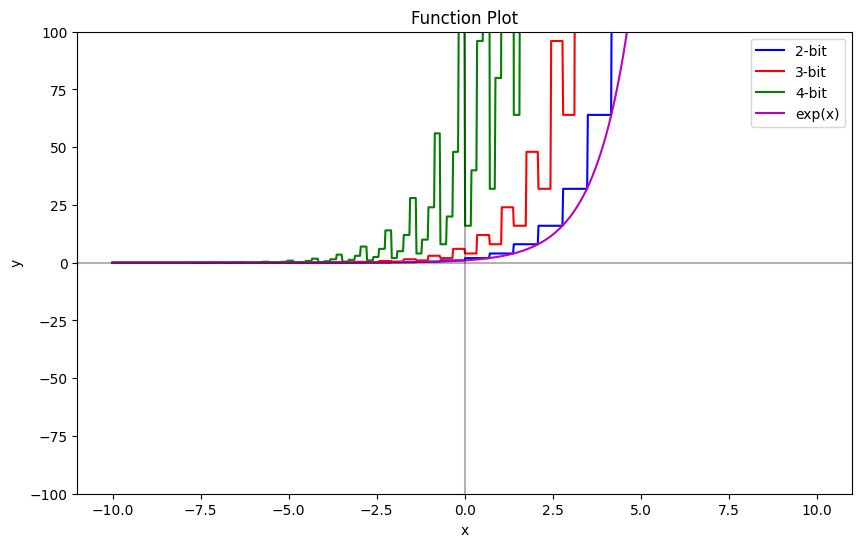

In [5]:
from a_cx_mxint_quant.softmax import MXIntHardwareExp
q_config = {
    "exp_width": 2,
    "exp_exponent_width": 8,
}
exp_module_2bit = MXIntHardwareExp({
    "exp_width": 2,
    "exp_exponent_width": 8,
})
exp_module_3bit = MXIntHardwareExp({
    "exp_width": 3,
    "exp_exponent_width": 8,
})
exp_module_4bit = MXIntHardwareExp({
    "exp_width": 4,
    "exp_exponent_width": 8,
})
func_list = [
    lambda x: exp_module_2bit(x)[0] * 2 ** exp_module_2bit(x)[1],
    lambda x: exp_module_3bit(x)[0] * 2 ** exp_module_3bit(x)[1],
    lambda x: exp_module_4bit(x)[0] * 2 ** exp_module_4bit(x)[1],
    lambda x: x.exp(),
]
plot_func(func_list, name_list=["2-bit", "3-bit", "4-bit", "exp(x)"], plot_range=[-10, 10], y_range=[-100, 100])


In [23]:
def get_acc_list(file_path, reference_value):
    new_lists = []
    with open(file_path, "rb") as f:
        acc_lists = pickle.load(f)
    for acc_list in acc_lists:
        acc_list = [(item[0], abs(item[1] - reference_value)) for item in acc_list]
        new_lists.append(acc_list)
    return new_lists

In [82]:
def plot_accuracy_loss(acc_lists, threshold=0.01, x_range=(0, 9), name=""):
    """
    Plot accuracy loss vs hash bits for different models on a log scale.
    
    Args:
        acc_lists: List of tuples (model_name, filtered_data) where filtered_data contains (hash_bits, loss) pairs
        threshold: Threshold value for horizontal reference line (default: 0.01 for 1% loss)
        x_range: Tuple of (min, max) for x-axis range
    """
    # Create the plot with log scale on y-axis
    plt.figure(figsize=(10, 6))

    # Plot each dataset with filtered range
    colors = ['b', 'r', 'g', 'm', 'c', 'y']  # Colors for different int widths

    for i, (model_name, filtered_data) in enumerate(acc_lists):
        if filtered_data:
            filtered_hash_bits, filtered_loss = zip(*filtered_data)
            color = colors[i % len(colors)]
            # Divide by 100 to convert percentage back to decimal for proper display
            plt.semilogy(filtered_hash_bits, [x for x in filtered_loss], 
                            f'{color}o-', linewidth=2, markersize=8, label=f'{model_name}')

    plt.grid(True, alpha=0.3)

    # Add labels and title
    plt.xlabel('Hash Bits')
    plt.ylabel('Accuracy Loss')
    plt.title(f'Accuracy Loss on Different Hash BiT Widths ({name})')

    # Add a horizontal line at threshold value for reference
    plt.axhline(y=threshold, color='k', linestyle='--', alpha=0.5, label=f'0.05% Threshold')

    # Set x-axis range explicitly
    plt.xlim(x_range)

    # Add legend
    plt.legend(loc='best')

    # Format y-axis to show percentage values
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1, decimals=2))

    plt.tight_layout()
    plt.show()


In [81]:

acc_lists = []
acc_lists.append(("DeiT-Tiny", get_acc_list("/home/cx922/mase/vit_tiny_saved_results/attention_exp_search.pkl", 0.72132)))
acc_lists.append(("DeiT-Small", get_acc_list("/home/cx922/mase/deit_small_saved_results/attention_exp_search.pkl", 0.7981)))
acc_lists.append(("DeiT-Base", get_acc_list("/home/cx922/mase/deit_base_saved_results/attention_exp_search.pkl", 0.8183)))
plot_accuracy_loss(acc_lists, threshold=0.001, x_range=(0, 9), name="Exp")

ValueError: too many values to unpack (expected 2)

<Figure size 1000x600 with 0 Axes>

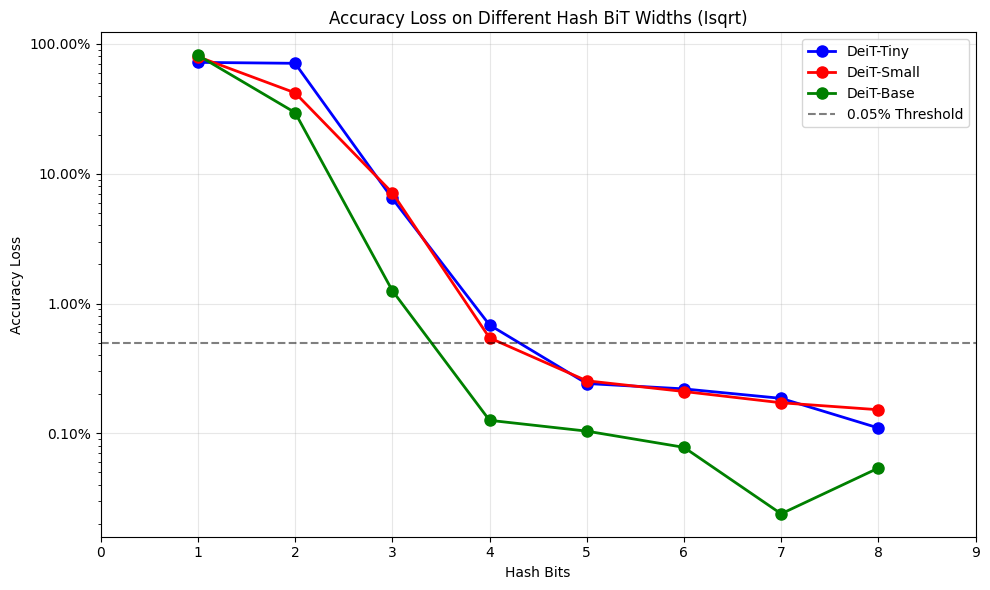

In [83]:

acc_lists = []
acc_lists.append(("DeiT-Tiny", get_acc_list("/home/cx922/mase/vit_tiny_saved_results/layer_norm_isqrt_search.pkl", 0.72132)[0]))
acc_lists.append(("DeiT-Small", get_acc_list("/home/cx922/mase/deit_small_saved_results/layer_norm_isqrt_search.pkl", 0.7981)[0]))
acc_lists.append(("DeiT-Base", get_acc_list("/home/cx922/mase/deit_base_saved_results/layer_norm_isqrt_search.pkl", 0.8183)[0]))
plot_accuracy_loss(acc_lists, threshold=0.005, x_range=(0, 9), name="Isqrt")

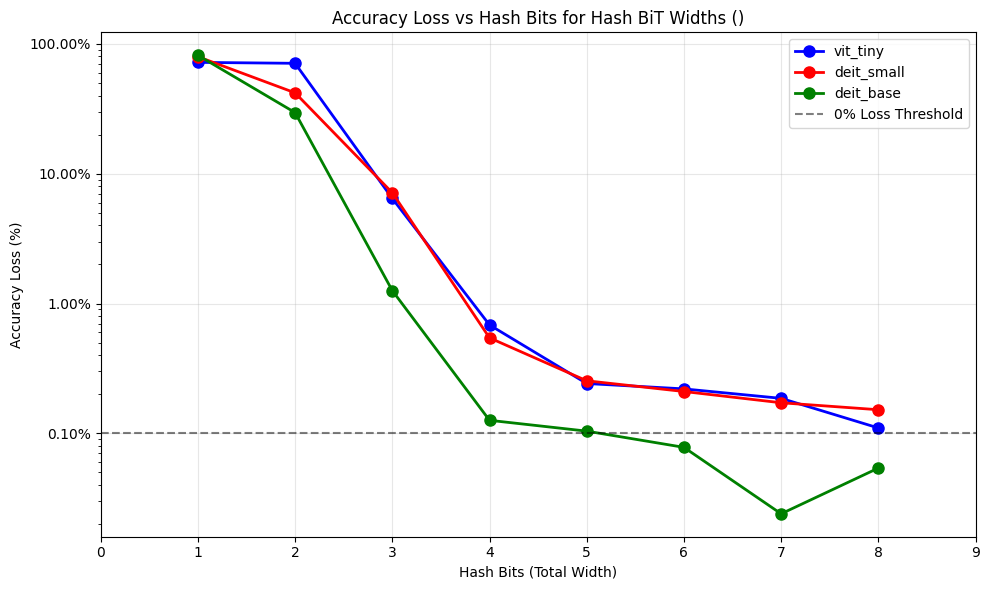

In [10]:

acc_lists = []
acc_lists.append(("vit_tiny", get_acc_list("/home/cx922/mase/vit_tiny_saved_results/layer_norm_isqrt_search.pkl", 0.72132)))
acc_lists.append(("deit_small", get_acc_list("/home/cx922/mase/deit_small_saved_results/layer_norm_isqrt_search.pkl", 0.7981)))
acc_lists.append(("deit_base", get_acc_list("/home/cx922/mase/deit_base_saved_results/layer_norm_isqrt_search.pkl", 0.8183)))
plot_accuracy_loss(acc_lists, threshold=0.001, x_range=(0, 9))

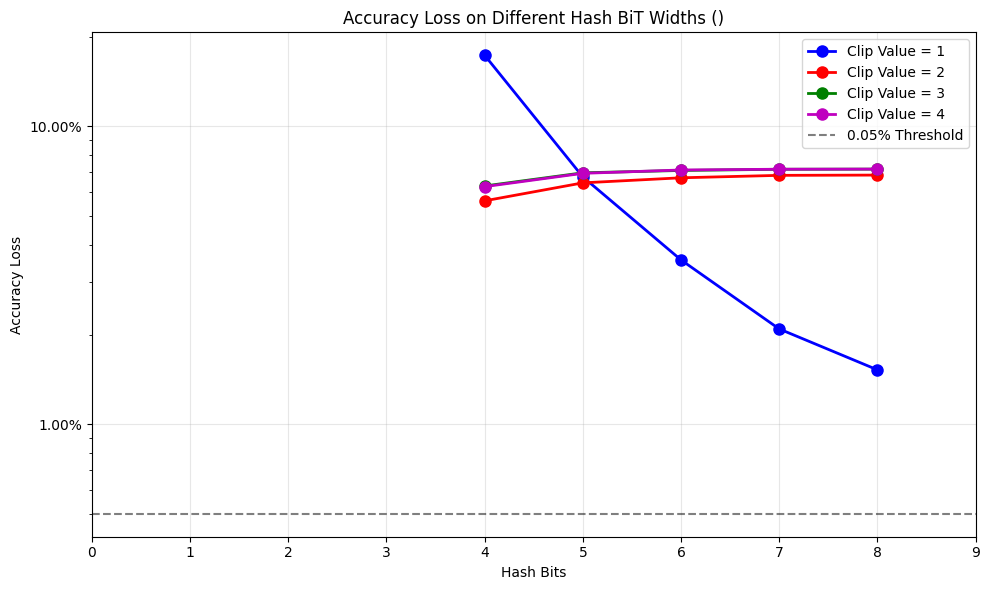

In [84]:

acc_lists = get_acc_list("/home/cx922/mase/vit_tiny_saved_results/gelu_mxint_search.pkl", 0.72132)
acc_lists = [(f"Clip Value = {i +1}", acc_list) for i, acc_list in enumerate(acc_lists)]
for i in range(4):
    acc_lists[i] = (acc_lists[i][0], [(item[0]+3, item[1]) for item in acc_lists[i][1]])
# acc_lists.append(("vit_tiny", get_acc_list("/home/cx922/mase/vit_tiny_saved_results/layer_norm_isqrt_search.pkl", 0.72132)))
# acc_lists.append(("deit_small", get_acc_list("/home/cx922/mase/deit_small_saved_results/layer_norm_isqrt_search.pkl", 0.7981)))
# acc_lists.append(("deit_base", get_acc_list("/home/cx922/mase/deit_base_saved_results/layer_norm_isqrt_search.pkl", 0.8183)))
plot_accuracy_loss(acc_lists[0:4], threshold=0.005, x_range=(0, 9))

In [59]:
get_acc_list("/home/cx922/mase/vit_tiny_saved_results/gelu_mxint_search.pkl", 0.72132)

[[(1, 0.17325999999999997),
  (2, 0.06765999999999994),
  (3, 0.035599999999999965),
  (4, 0.02088000000000001),
  (5, 0.015220000000000011)],
 [(1, 0.05622000000000005),
  (2, 0.06459999999999999),
  (3, 0.06718000000000002),
  (4, 0.06846000000000008),
  (5, 0.0686)],
 [(1, 0.06306),
  (2, 0.06982),
  (3, 0.07110000000000005),
  (4, 0.07176000000000005),
  (5, 0.07184000000000001)],
 [(1, 0.06274000000000002),
  (2, 0.06954000000000005),
  (3, 0.07136000000000009),
  (4, 0.07178000000000007),
  (5, 0.07186000000000003)],
 [(1, 0.06222000000000005),
  (2, 0.06968000000000008),
  (3, 0.07138),
  (4, 0.07166000000000006),
  (5, 0.07188000000000005)]]

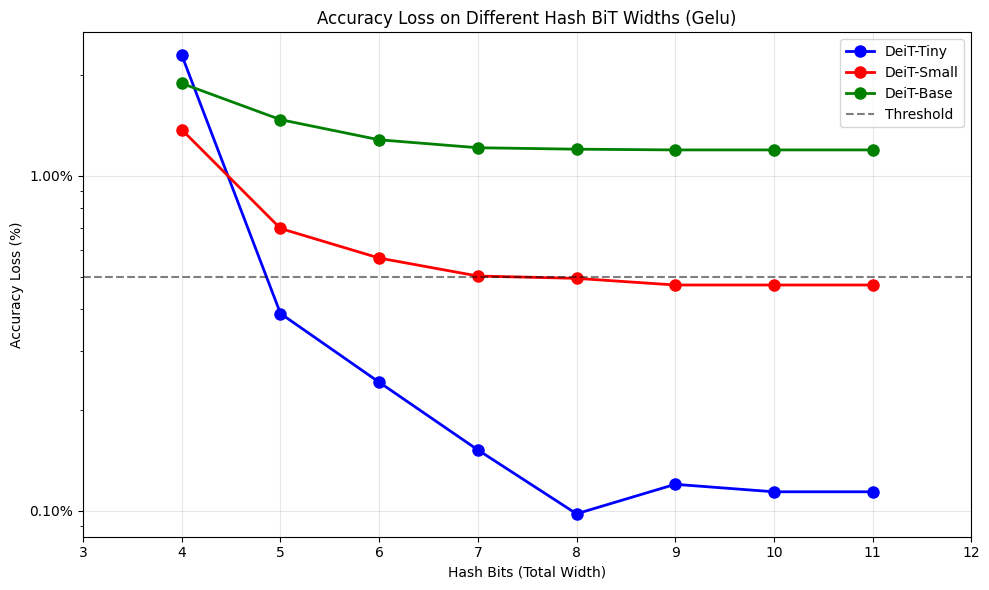

In [74]:
acc_lists = []
acc_lists.append(("DeiT-Tiny", get_acc_list("/home/cx922/mase/deit_tiny_saved_results/gelu_mxint_search.pkl", 0.72132)[0]))
acc_lists.append(("DeiT-Small", get_acc_list("/home/cx922/mase/deit_small_saved_results/gelu_mxint_search.pkl", 0.7981)[0]))
acc_lists.append(("DeiT-Base", get_acc_list("/home/cx922/mase/deit_base_saved_results/gelu_mxint_search.pkl", 0.8183)[0]))
# acc_lists = [(f"Clip Value = {i +1}", acc_list) for i, acc_list in enumerate(acc_lists)]
for i in range(3):
    acc_lists[i] = (acc_lists[i][0], [(item[0]+3, item[1]) for item in acc_lists[i][1]])
plot_accuracy_loss(acc_lists[0:4], threshold=0.005, x_range=(3, 12), name="Gelu")

In [ ]:
acc_lists

In [29]:
acc_lists

[('clip_value = 0',
  [(1, 0.37401999999999996),
   (2, 0.26147999999999993),
   (3, 0.21675999999999995),
   (4, 0.19663999999999993),
   (5, 0.18447999999999998)]),
 ('clip_value = 1',
  [(1, 0.03611999999999993),
   (2, 0.01189999999999991),
   (3, 0.007000000000000006),
   (4, 0.005679999999999907),
   (5, 0.005619999999999958)]),
 ('clip_value = 2',
  [(1, 0.02288000000000001),
   (2, 0.0038799999999999946),
   (3, 0.0024199999999999777),
   (4, 0.0015199999999999658),
   (5, 0.0009799999999999809)]),
 ('clip_value = 3',
  [(1, 0.02311999999999992),
   (2, 0.0045999999999999375),
   (3, 0.0024999999999999467),
   (4, 0.0021999999999999797),
   (5, 0.0012999999999999678)]),
 ('clip_value = 4',
  [(1, 0.02310000000000001),
   (2, 0.0045999999999999375),
   (3, 0.0024999999999999467),
   (4, 0.0021999999999999797),
   (5, 0.0013199999999999878)])]